In [ ]:
# Copyright © 2016 by Marena Trinidad. All rights reserved.

In [16]:
import pandas as pd
import numpy as np
import pickle
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
import matplotlib as plt
%matplotlib inline

In [17]:
# LOAD DATA
chem_lib = pd.read_csv('/Users/marenaisabelle/CODE/GADSI/fulldf')
with open('/Users/marenaisabelle/CODE/GADSI/Capstone/pickle_prints','rb') as f: # Load pickled fingerprints by de-serialize
    fps = pickle.load(f)

In [24]:
# DEFINE PREDICTORS(X= Fingerprints) AND TARGET(Y= Activity)
x = np.asmatrix(fps)
y = chem_lib.Activity.values

In [19]:
# OBSERVE PERFORMANCE OF DEFAULT RF MODEL
rf_best = RandomForestClassifier(n_estimators=100, criterion='entropy', max_features='auto', random_state=1024)

TRAIN SIZE: 3486
NUMBER OF TRUE POSITIVES IN TEST:  81
ACCURACY: 0.975616752725
F1: 0.158415841584
RECALL: 0.0987654320988
PRECISION: 0.259853169291
CONFUSION MATRIX: [[3393   12]
 [  73    8]]


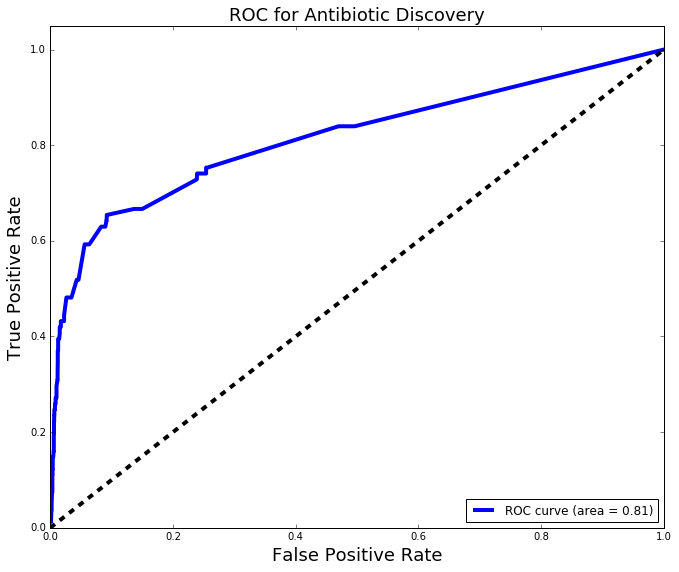

THRESHOLD: 0.94666667, , 0.890000
FALSE POSITIVE RATES [  0.00000000e+00   8.81057269e-04   1.46842878e-03   1.46842878e-03
   1.76211454e-03   1.76211454e-03   2.34948605e-03   2.34948605e-03
   2.93685756e-03   3.52422907e-03   3.52422907e-03   3.81791483e-03
   3.81791483e-03   4.11160059e-03   4.11160059e-03   4.99265786e-03
   5.58002937e-03   5.87371512e-03   5.87371512e-03   6.16740088e-03
   6.16740088e-03   6.46108664e-03   6.46108664e-03   6.75477239e-03
   6.75477239e-03   7.34214391e-03   7.63582966e-03   7.92951542e-03
   8.81057269e-03   8.81057269e-03   1.02790015e-02   1.02790015e-02
   1.17474302e-02   1.20411160e-02   1.20411160e-02   1.23348018e-02
   1.23348018e-02   1.29221733e-02   1.29221733e-02   1.38032305e-02
   1.43906021e-02   1.46842878e-02   1.55653451e-02   1.55653451e-02
   1.67400881e-02   1.73274596e-02   1.73274596e-02   1.76211454e-02
   1.87958884e-02   2.05580029e-02   2.11453744e-02   2.23201175e-02
   2.26138032e-02   2.26138032e-02   2.64317181e

In [20]:
# ISOLATION FORREST EVALUATION
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix,recall_score, average_precision_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.333)
rf_best.fit(X_train, y_train)

FPR = dict()
TPR = dict()
ROC_AUC = dict()

ypred = rf_best.predict(X_test).tolist()
predprob = rf_best.predict_proba(X_test)
accuracy = accuracy_score(y_test, ypred)
f1 = f1_score(y_test, ypred)
cmat = confusion_matrix(y_test, ypred)
rec = recall_score(y_test, ypred)
prec = average_precision_score(y_test, ypred)
# Find the area under the curve for "Active Class"
FPR[1], TPR[1], thresholds = roc_curve(y_test, rf_best.predict_proba(X_test)[:,1])
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Print major stats
print "TRAIN SIZE:" , len(y_test)
print "NUMBER OF TRUE POSITIVES IN TEST: " , len([x for x in y_test if x != 0])
print "ACCURACY:", accuracy
print "F1:" , f1
print "RECALL:", rec
print "PRECISION:" , prec
print "CONFUSION MATRIX:" , cmat

# Plot of a ROC curve for "Active Class"
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for Antibiotic Discovery', fontsize=18)
plt.legend(loc="lower right")
plt.show()

print "THRESHOLD: %.8f, , %f" % (thresholds[0], thresholds[1])
print "FALSE POSITIVE RATES" , FPR[1]

In [22]:
# DEFINE PARAMS FOR GRIDSEARCH
params = {
    'n_estimators': [100, 250, 500, 750],
    'criterion': ['entropy'],
    'max_features': ['auto'],
    'random_state': [1024]
    
}

In [23]:
# DEFINE CV SCHEME
sss = StratifiedShuffleSplit(y, n_iter=2) 
# Stratified-Shuffle-Split to ensure train data preserves class imbalance in cv

In [24]:
# DEFINE YOUR ESTIMATOR
rf = RandomForestClassifier()

In [25]:
# DEFINE GRIDSEARCH
gsearch = GridSearchCV(rf, param_grid=params, verbose=2, cv=sss, scoring='roc_auc')

In [26]:
# EXECUTE GRIDSEARCH
gsearch.fit(x, y)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV] n_estimators=10, criterion=entropy ..............................
[CV] ..................... n_estimators=10, criterion=entropy -   1.2s
[CV] n_estimators=10, criterion=entropy ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] ..................... n_estimators=10, criterion=entropy -   1.2s
[CV] n_estimators=250, criterion=entropy .............................
[CV] .................... n_estimators=250, criterion=entropy -  26.7s
[CV] n_estimators=250, criterion=entropy .............................
[CV] .................... n_estimators=250, criterion=entropy -  25.4s
[CV] n_estimators=500, criterion=entropy .............................
[CV] .................... n_estimators=500, criterion=entropy -  49.5s
[CV] n_estimators=500, criterion=entropy .............................
[CV] .................... n_estimators=500, criterion=entropy -  48.0s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.5min finished


GridSearchCV(cv=StratifiedShuffleSplit(labels=[ 0.  0. ...,  0.  0.], n_iter=2, test_size=0.1, random_state=None),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 250, 500], 'criterion': ['entropy']},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=2)

In [28]:
# EXTRACT BEST FEATURES TO DEFINE/FIT OPTIMAL XGBLOGREG

print "BEST PARAMS:" , gsearch.best_params_
rf_best.set_params(**gsearch.best_params_)

BEST PARAMS: {'n_estimators': 500, 'criterion': 'entropy'}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

TRAIN SIZE: 3486
NUMBER OF TRUE POSITIVES IN TEST:  87
ACCURACY: 0.974756167527
F1: 0.2
RECALL: 0.126436781609
PRECISION: 0.313249571428
CONFUSION MATRIX: [[3387   12]
 [  76   11]]


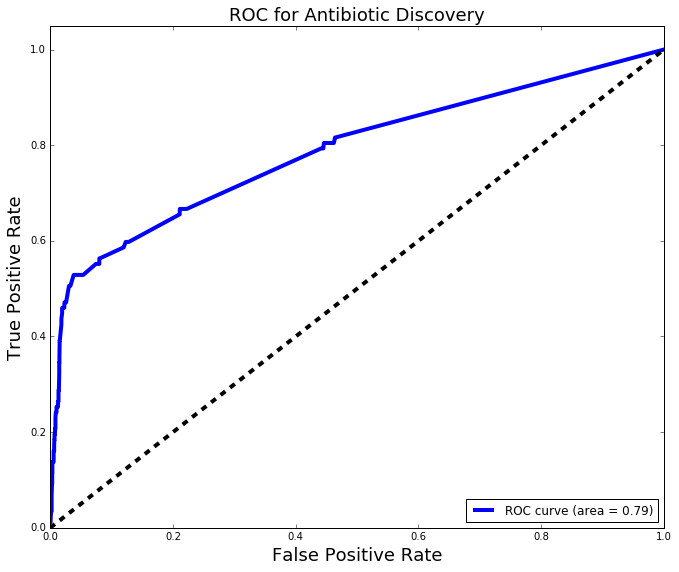

THRESHOLD: 0.93000000, , 0.810000
FALSE POSITIVE RATES [  0.00000000e+00   5.88408355e-04   8.82612533e-04   1.47102089e-03
   1.76522507e-03   2.35363342e-03   2.35363342e-03   2.35363342e-03
   2.94204178e-03   3.23624595e-03   3.23624595e-03   3.53045013e-03
   3.53045013e-03   4.11885849e-03   4.41306267e-03   5.29567520e-03
   5.58987938e-03   5.58987938e-03   6.17828773e-03   6.47249191e-03
   6.47249191e-03   6.76669609e-03   7.06090026e-03   7.06090026e-03
   7.64930862e-03   7.94351280e-03   8.53192115e-03   8.53192115e-03
   9.12032951e-03   1.02971462e-02   1.02971462e-02   1.11797588e-02
   1.26507796e-02   1.29449838e-02   1.35333922e-02   1.35333922e-02
   1.41218005e-02   1.47102089e-02   1.47102089e-02   1.50044131e-02
   1.50044131e-02   1.52986172e-02   1.52986172e-02   1.55928214e-02
   1.82406590e-02   1.82406590e-02   1.94174757e-02   1.94174757e-02
   2.00058841e-02   2.03000883e-02   2.23595175e-02   2.29479259e-02
   2.32421300e-02   2.58899676e-02   3.05972345e

In [25]:
# EVALUATE BEST RF
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, confusion_matrix, recall_score, average_precision_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.333)
rf_best.fit(X_train, y_train)
FPR = dict()
TPR = dict()
ROC_AUC = dict()

ypred = rf_best.predict(X_test).tolist()
predprob = rf_best.predict_proba(X_test)
accuracy = accuracy_score(y_test, ypred)
f1 = f1_score(y_test, ypred)
cmat = confusion_matrix(y_test, ypred)
rec = recall_score(y_test, ypred)
prec = average_precision_score(y_test, ypred)
# Find the area under the curve for "Active Class"
FPR[1], TPR[1], thresholds = roc_curve(y_test, rf_best.predict_proba(X_test)[:,1])
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Print major stats
print "TRAIN SIZE:" , len(y_test)
print "NUMBER OF TRUE POSITIVES IN TEST: " , len([x for x in y_test if x != 0])
print "ACCURACY:", accuracy
print "F1:" , f1
print "RECALL:", rec
print "PRECISION:" , prec
print "CONFUSION MATRIX:" , cmat

# Plot of a ROC curve for "Active Class"
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for Antibiotic Discovery', fontsize=18)
plt.legend(loc="lower right")
plt.show()

print "THRESHOLD: %.8f, , %f" % (thresholds[0], thresholds[1])
print "FALSE POSITIVE RATES" , FPR[1]

In [ ]:
# FEATURE IMPORTANCES: OPTIMIZED RF

feature_imp = [x for x in rf.feature_importances_]
m = pd.Series(feature_imp).nlargest(10)
print m
plt.plot(feature_imp)
plt.xlabel('BitID', fontsize=18)
plt.ylabel('Feature Importance', fontsize=18)
plt.title('Bit-Feature Importance', fontsize=18)
plt.show()

print pd.Series(feature_imp).describe()